In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

# 1. Data Loading

In [2]:
data_str = """Ticker,Sector,MarketCap,Beta,GrossMargin,PEG,PE,PBR,DivYield,ROE,ROIC,Vol,FwdReturn,Return1m,Return12m,NetDE
AAPL UW,Information Technology,562022,1.38,38.80,2.12,11.84,4.38,2.00,39.06,27.47,21.97,2.36,11.49,-13.70,0.19
MSFT UW,Information Technology,442557,1.23,62.66,NA,19.39,5.96,2.36,12.34,8.72,22.65,2.01,13.69,27.42,-0.79
XOM UN,Energy,368876,0.82,21.54,NA,24.26,2.14,3.28,7.58,6.63,13.99,-1.18,-0.78,13.34,0.22
JNJ UN,Health Care,344596,0.75,69.43,0.20,18.06,4.74,2.40,21.89,17.51,9.79,-4.07,5.27,29.44,-0.23
AMZN UW,Consumer Discretionary,359676,1.34,33.48,0.00,91.71,24.27,0.00,9.10,4.35,27.04,1.36,6.31,43.07,0.10
GE UN,Industrials,279053,1.02,34.08,0.03,19.02,3.14,2.95,8.33,2.72,17.84,0.32,4.38,23.61,1.22
FB UW,Information Technology,355708,1.17,83.88,0.47,27.29,7.52,0.00,11.02,11.01,17.89,1.76,10.91,31.18,-0.44
NESN VX,Consumer Staples,250209,0.78,49.62,NA,22.10,3.84,2.90,13.69,11.59,13.88,0.77,5.11,10.82,0.24
T UN,Telecommunication Services,266320,0.46,38.60,NA,14.68,2.16,4.39,13.19,6.59,11.39,-5.57,2.46,30.59,0.98
JPM UN,Financials,231060,1.25,NA,0.51,10.71,1.04,2.75,9.69,4.09,24.89,5.52,8.54,-3.00,2.27
WFC UN,Financials,242176,1.07,NA,0.94,11.59,1.40,3.13,11.75,5.69,20.34,6.75,4.40,-13.69,1.82
GOOG UW,Information Technology,527988,1.21,61.78,0.40,20.29,4.27,0.00,14.24,13.93,16.61,-0.23,9.69,18.78,-0.57
PG UN,Consumer Staples,228360,0.60,50.23,NA,21.47,3.92,3.11,14.03,10.80,11.36,2.01,3.66,9.32,0.33
PFE UN,Health Care,223762,0.61,72.03,0.09,14.45,3.55,3.09,11.65,8.10,12.78,-4.86,6.48,7.43,0.32
VZ UN,Telecommunication Services,225851,0.60,47.56,2.26,13.93,12.12,4.05,128.45,14.94,12.93,-5.56,1.08,25.13,5.58
CVX UN,Energy,193144,1.23,8.07,NA,30.39,1.28,4.18,0.85,0.70,16.28,-0.83,0.16,15.52,0.22
NOVN VX,Health Care,197850,1.09,64.35,NA,16.84,2.78,3.36,9.13,7.54,18.76,-3.61,3.68,-15.70,0.32
BRK/B UN,Financials,355729,0.88,24.96,1.22,18.60,1.38,0.00,9.80,7.20,15.94,4.31,2.95,0.84,0.17
KO UN,Consumer Staples,188263,0.57,59.90,NA,22.08,7.59,3.07,27.08,13.62,13.52,-0.46,-1.20,11.11,0.99
MRK UN,Health Care,162462,0.82,62.81,0.71,15.67,3.71,3.10,10.08,6.56,16.40,7.04,5.13,5.11,0.29
ROG VX,Health Care,218243,1.04,69.34,0.02,15.97,10.05,3.27,43.70,23.02,20.07,-3.11,-0.28,-8.42,0.66
HD UN,Consumer Discretionary,170865,1.06,32.27,0.91,20.51,27.17,1.78,93.09,28.78,15.99,-2.48,8.18,22.59,2.79
INTC UW,Information Technology,164400,1.41,62.20,0.12,13.30,2.69,2.81,19.46,15.12,21.46,3.74,11.48,24.05,0.17
BAC UN,Financials,148041,1.46,NA,NA,10.19,0.63,1.38,6.18,3.22,33.22,11.90,15.59,-16.82,1.12
7203 JT,Consumer Discretionary,173183,0.94,20.05,5.23,10.57,1.07,3.56,13.60,8.60,33.75,5.84,17.77,-25.12,0.76
CMCSA UW,Consumer Discretionary,162195,0.69,58.39,0.99,17.97,3.10,1.52,15.72,8.27,13.67,-2.96,8.05,10.63,0.95
CSCO UW,Information Technology,153688,1.37,62.51,0.63,12.52,2.46,2.92,16.91,12.63,19.58,2.98,10.83,11.97,-0.56
V UN,Information Technology,184419,0.93,78.23,0.91,24.14,5.81,0.67,23.85,18.68,21.15,3.83,5.36,6.71,-0.17
PM UN,Consumer Staples,155536,0.72,64.38,0.03,21.19,NA,4.05,NA,50.88,16.76,-0.33,0.57,21.11,-2.11
PEP UN,Consumer Staples,156954,0.62,54.91,NA,21.84,13.99,2.58,38.27,12.83,12.88,-1.30,5.86,15.84,2.04
005930 KP,Information Technology,194464,0.99,37.45,0.54,9.58,1.28,1.36,11.65,11.54,21.70,5.26,7.80,24.56,-0.36
700 HK,Information Technology,226081,0.96,58.39,0.62,31.22,11.53,0.25,28.87,19.78,23.56,8.20,10.85,29.39,-0.83
DIS UN,Consumer Discretionary,163115,1.06,41.35,1.08,15.75,3.70,1.43,20.22,15.49,15.01,-1.55,0.57,-17.93,0.37
HSBA LN,Financials,130240,1.19,NA,NA,11.19,0.73,6.91,6.44,3.34,19.57,15.59,10.66,-7.94,0.22
IBM UN,Information Technology,153528,0.96,48.76,0.18,11.59,10.33,3.24,95.80,25.52,18.82,-0.23,10.75,4.66,2.06
C UN,Financials,127286,1.62,NA,1.22,8.83,0.61,0.46,7.16,3.81,34.88,8.97,9.40,-23.90,1.24
2330 TT,Information Technology,130621,0.97,45.46,0.80,13.34,3.49,3.48,24.33,20.89,20.60,2.03,12.42,36.80,-0.31
ORCL UN,Information Technology,169536,1.10,74.74,0.30,14.61,3.72,1.46,18.82,10.76,19.97,0.44,5.65,6.50,-0.23
MO UN,Consumer Staples,132286,0.46,62.41,0.31,21.00,48.25,3.27,205.76,35.00,11.90,-2.38,-1.18,26.19,3.29
UNH UN,Health Care,136613,0.83,NA,0.34,16.68,3.88,1.40,17.93,10.94,13.06,-4.99,2.92,19.52,0.66"""

In [3]:
# Read the CSV (first column as index, NA strings converted to np.nan)
data = pd.read_csv(StringIO(data_str), index_col = 0, na_values = ['NA'])

# 2. Median Imputation for Numeric Columns

In [4]:
data_imputed = data.copy()
for col in data_imputed.select_dtypes(include = np.number).columns:
    median_val = data_imputed[col].median()
    data_imputed[col].fillna(median_val, inplace = True)

# For modeling, convert categorical variable 'Sector' into dummies
def prepare_features(df, target_col):
    X = df.drop(columns=[target_col])
    # One-hot encode categorical columns (here: Sector)
    X = pd.get_dummies(X, drop_first=True)
    y = df[target_col]
    return X, y

X_full, y_full = prepare_features(data_imputed, 'FwdReturn')

# 3. Linear Model Fitting and RMSE Calculation

In [6]:
# Question 1: fit a linear model, FwdReturn being the dependent variable, data_imputed the explanatory variables
linreg = LinearRegression()
linreg.fit(X_full, y_full)
preds_in_sample = linreg.predict(X_full)
# In-sample RMSE
# Question 2: calculate the in-sample RMSE 
rmse_in_sample = np.sqrt(mean_squared_error(y_full, preds_in_sample))
print("In-sample RMSE (linear model):", rmse_in_sample)

In-sample RMSE (linear model): 1.975832890630742


# 4. Split Data: First 30 for training, rest for testing

In [8]:
# Use the first 30 data points to fit the model and the rest to test
# Question 3: define the training dataset and the test dataset
X_train = X_full[:30]
X_test = X_full[30:]

y_train = y_full[:30]
y_test = y_full[30:]

# Fit linear model on training data
# Question 4: make predictions for test, using lm_model.fit and calculate the out of sample RMSE
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)
preds_test = linreg2.predict(X_test)
# Out-of-sample RMSE
rmse_out_sample = np.sqrt(mean_squared_error(y_test, preds_test))
print("Out-of-sample RMSE (linear model):", rmse_out_sample)

Out-of-sample RMSE (linear model): 4.110101094528471


# 5. Model Fitting (Linear model and Random Forest via scikit-learn)

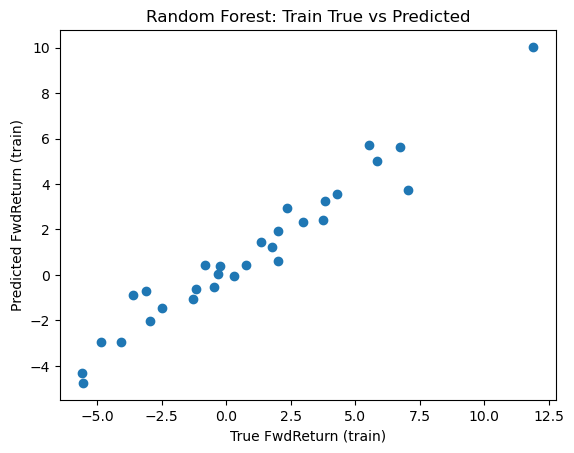

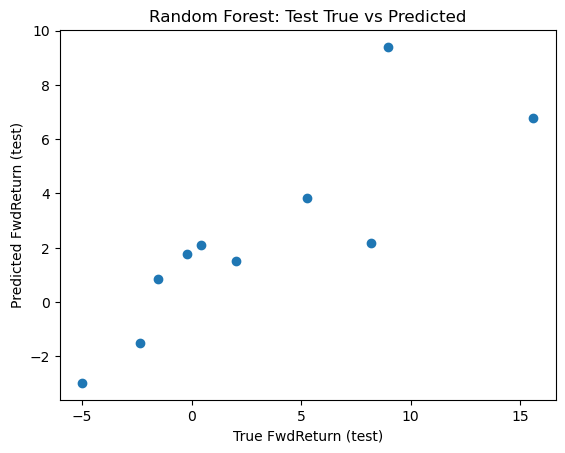

In [9]:
# Question 5 & 6 & 7: build a random forest model and make predictions with the training and test datasets, then plot the FwdReturn of the training (resp. test) vs. the predictions

# Random Forest model on training data
rf_model = RandomForestRegressor(random_state=202202)
rf_model.fit(X_train, y_train)

preds_rf_test = rf_model.predict(X_test)
preds_rf_train = rf_model.predict(X_train)

# Plot predictions vs true values for Random Forest
plt.figure()
plt.scatter(y_train, preds_rf_train)
plt.xlabel("True FwdReturn (train)")
plt.ylabel("Predicted FwdReturn (train)")
plt.title("Random Forest: Train True vs Predicted")
plt.show()

plt.figure()
plt.scatter(y_test, preds_rf_test)
plt.xlabel("True FwdReturn (test)")
plt.ylabel("Predicted FwdReturn (test)")
plt.title("Random Forest: Test True vs Predicted")
plt.show()

# 6. Repeated Cross-Validation Resampling

In [10]:
# Question 8: Defining repeated cross-validation resampling scheme
cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 202202)
rf_cv = RandomForestRegressor(random_state = 202202)
rf_cv = RandomForestRegressor(random_state = 202202)
cv_scores = cross_val_score(rf_cv, X_full, y_full, scoring = 'neg_mean_squared_error', cv = cv)
rmse_cv = np.sqrt(-cv_scores.mean())
print("CV RMSE (repeated 5-fold, 10 repeats):", rmse_cv)

CV RMSE (repeated 5-fold, 10 repeats): 3.6130287407969788


# 7. Tuning: Simple Grid Search for max_features

In [11]:
# Question 9: find the optimal max_features using simple grid search
param_grid = {'max_features': list(range(2, X_full.shape[1]+1))}
grid_rf = GridSearchCV(RandomForestRegressor(random_state = 202202),
                       param_grid, cv = cv, scoring = 'neg_mean_squared_error')
grid_rf.fit(X_full, y_full)
print("Optimal max_features (mtry):", grid_rf.best_params_)
print("Lowest CV RMSE (RF):", np.sqrt(-grid_rf.best_score_))

Optimal max_features (mtry): {'max_features': 5}
Lowest CV RMSE (RF): 3.50106721387922


# 8. Custom Tuning for Boosted Trees (GBM)

In [12]:
# Question 10: Build a GBM model and grid search for several parameters
gbm_param_grid = {
    'n_estimators': list(range(20, 101, 10)),
    'max_depth': [1, 3, 5],
    'learning_rate': [0.1, 0.15],
    'min_samples_leaf': [3, 5]
}
# Question 11: how many confirgurations are we going to test ?
gbm = GradientBoostingRegressor(random_state = 202202)
grid_gbm = GridSearchCV(gbm, gbm_param_grid, cv = cv,  scoring='neg_mean_squared_error')
grid_gbm.fit(X_full, y_full)
print("Optimal GBM parameters:", grid_gbm.best_params_)
print("Lowest CV RMSE (GBM):", np.sqrt(-grid_gbm.best_score_))

Optimal GBM parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 40}
Lowest CV RMSE (GBM): 3.7943806590311135
